# Survival of a Patient


The objective of this project to help the hospital in the province of Greenland to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import pymysql


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Disply all Columns
pd.options.display.max_columns=70

In [4]:
tsb = pd.read_csv('Training_set_begs.csv')
tsb.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
tsb.shape

(23097, 18)

In [6]:
tsb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [8]:
# Make all features in lower
tsb.columns = [col.lower() for col in tsb.columns]
# Print the new columns
tsb.columns
tsb.head()

,id_patient_care_situation,diagnosed_condition,patient_id,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [9]:
tsb.describe()

,id_patient_care_situation,diagnosed_condition,patient_id,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [10]:
tsb.describe().T

,count,mean,std,min,25%,50%,75%,max
id_patient_care_situation,23097.0,16545.712041,9532.263503,2.0000,8280.00000,16597.000000,24825.000000,33014.000000
diagnosed_condition,23097.0,26.413127,15.030865,0.0000,13.00000,26.000000,39.000000,52.000000
patient_id,23097.0,6261.280772,3595.990620,1.0000,3181.00000,6242.000000,9363.000000,12515.000000
patient_age,23097.0,33.209768,19.549882,0.0000,16.00000,33.000000,50.000000,149.000000
patient_body_mass_index,23097.0,23.454820,3.807661,1.0893,20.20555,23.386199,26.788154,29.999579
a,21862.0,0.897905,0.302780,0.0000,1.00000,1.000000,1.000000,1.000000
b,21862.0,0.136355,0.343173,0.0000,0.00000,0.000000,0.000000,1.000000
c,21862.0,0.185070,0.388363,0.0000,0.00000,0.000000,0.000000,1.000000
d,21862.0,0.083615,0.276817,0.0000,0.00000,0.000000,0.000000,1.000000
e,21862.0,0.393239,0.488480,0.0000,0.00000,0.000000,1.000000,1.000000


In [16]:
tsb['survived_1_year'].value_counts()

1    14603
0     8494
Name: survived_1_year, dtype: int64

In [14]:
tsb['survived_1_year'].value_counts(normalize=True)

1    0.632247
0    0.367753
Name: survived_1_year, dtype: float64

In [12]:
# to see statistics on non-numerical features,
tsb.describe(include=['object']).T

,count,unique,top,freq
treated_with_drugs,23084,32,DX6,8606
patient_smoker,23097,3,NO,13246
patient_rural_urban,23097,2,RURAL,16134
patient_mental_condition,23097,1,Stable,23097


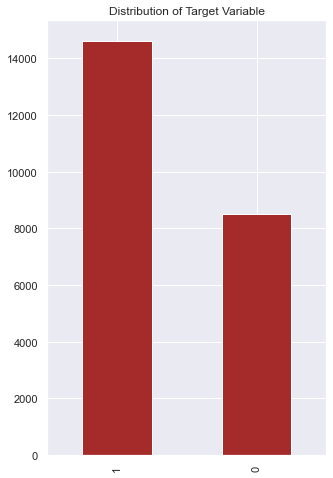

In [17]:
(tsb['survived_1_year'].value_counts().plot(
        kind='bar',
        figsize=(5, 8),
        title='Distribution of Target Variable',
        color='brown'
    )
);
plt.show()

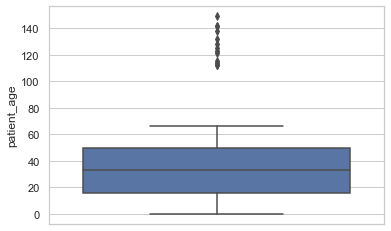

In [29]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ay = sns.boxplot(y="patient_age", data=tsb)

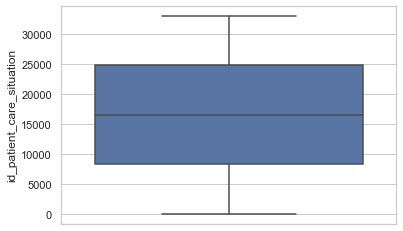

In [38]:
ay = sns.boxplot(y="id_patient_care_situation", data=tsb)

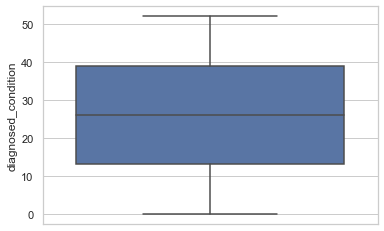

In [39]:
ay = sns.boxplot(y="diagnosed_condition", data=tsb)

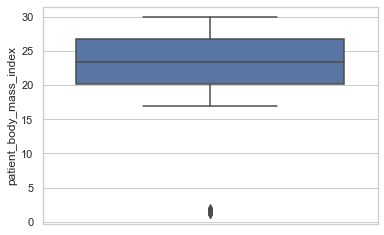

In [40]:
ay = sns.boxplot(y="patient_body_mass_index", data=tsb)

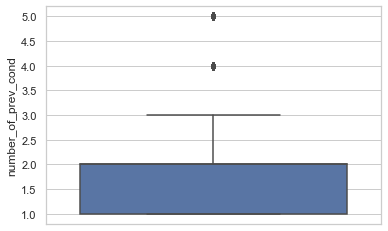

In [41]:
ay = sns.boxplot(y="number_of_prev_cond", data=tsb)

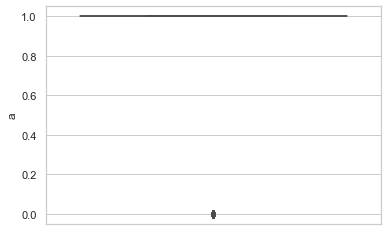

In [42]:
ay = sns.boxplot(y="a", data=tsb)

In [ ]:
ay = sns.boxplot(y="b", data=tsb)

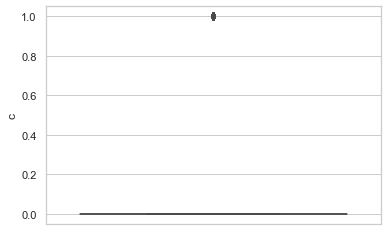

In [43]:
ay = sns.boxplot(y="c", data=tsb)

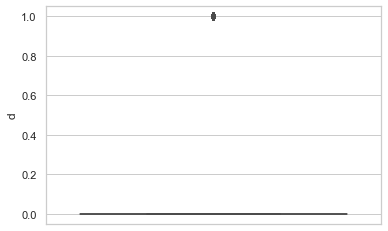

In [44]:
ay = sns.boxplot(y="d", data=tsb)

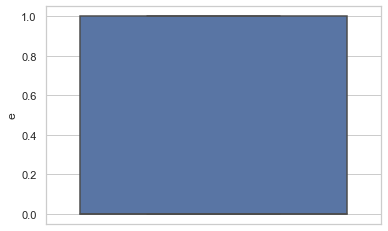

In [45]:
ay = sns.boxplot(y="e", data=tsb)

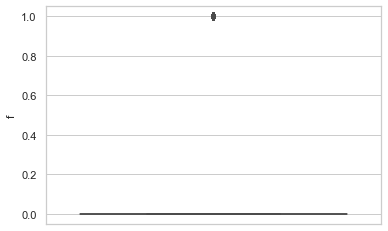

In [46]:
ay = sns.boxplot(y="f", data=tsb)

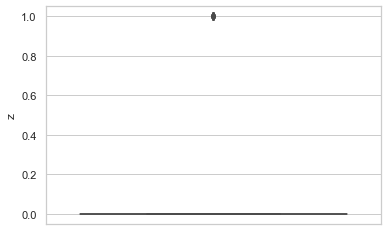

In [47]:
ay = sns.boxplot(y="z", data=tsb)

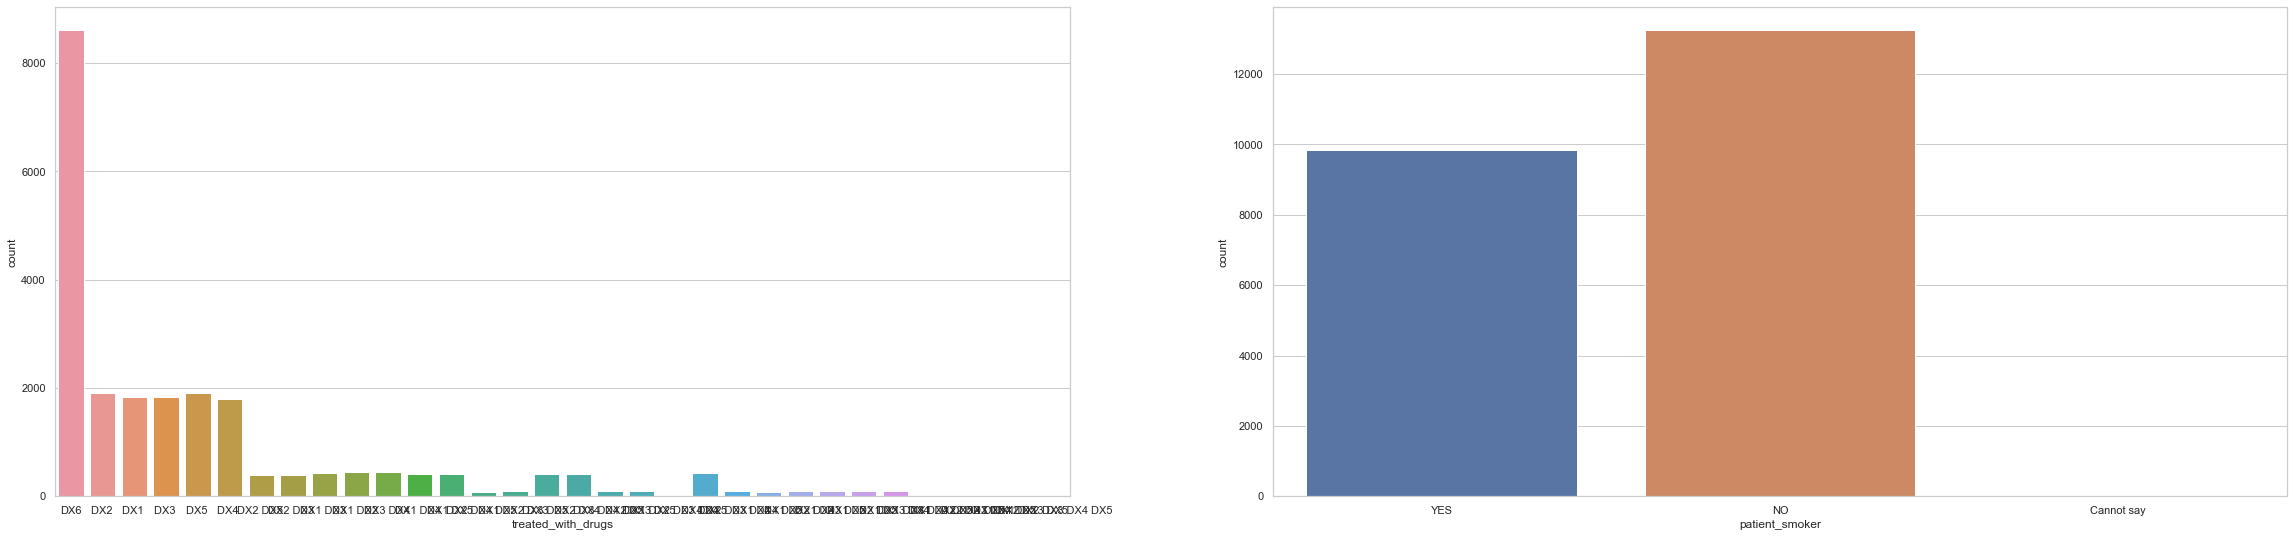

In [34]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 9))

sns.countplot(x='treated_with_drugs', data=tsb, ax=axes[0]);
sns.countplot(x='patient_smoker', data=tsb, ax=axes[1]);


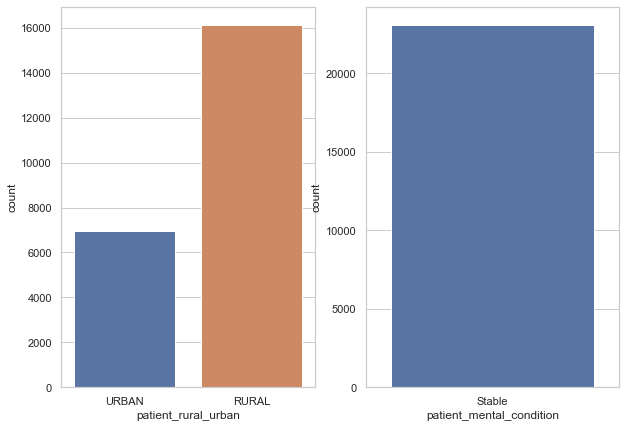

In [35]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(1, 7))
sns.countplot(x='patient_rural_urban', data=tsb, ax=axes[0]);
sns.countplot(x='patient_mental_condition', data=tsb, ax=axes[1]);